In [4]:
pip install diffusers transformers accelerate torch

In [5]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [6]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [8]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors = True)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = """a blue dragon and a unicorn """

In [12]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  a dragon flying among clouds, green scales and blue dragon 


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

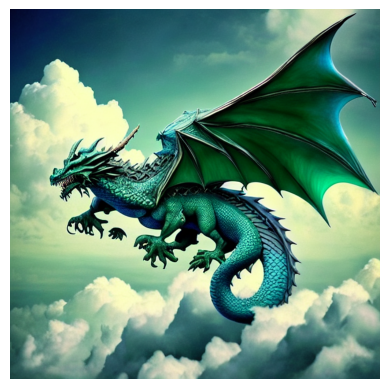

In [13]:
print("[PROMPT]: ", prompt)
plt.imshow(image)
plt.axis("off")

In [14]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True)

with torch.no_grad():
    outputs = clip_model(**inputs)
    logits_per_image = outputs.logits_per_image
    similarity_score = logits_per_image.softmax(dim=1)[0][0].item()

print(f"Prompt-Image Similarity Score (CLIP): {similarity_score:.4f}")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Prompt-Image Similarity Score (CLIP): 1.0000


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

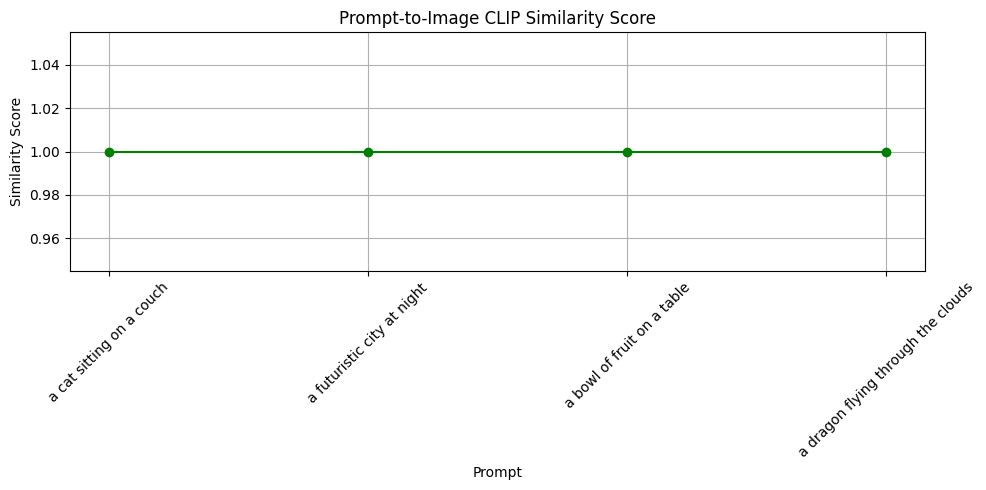

In [ ]:
import matplotlib.pyplot as plt

prompts = [
    "a cat sitting on a couch",
    "a futuristic city at night",
    "a bowl of fruit on a table",
    "a dragon flying through the clouds"
]

scores = []

for prompt in prompts:
    image = pipe(prompt).images[0]
    inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        score = outputs.logits_per_image.softmax(dim=1)[0][0].item()
        scores.append(score)

plt.figure(figsize=(10,5))
plt.plot(prompts, scores, marker='o', color='green')
plt.xticks(rotation=45)
plt.title("Prompt-to-Image CLIP Similarity Score")
plt.ylabel("Similarity Score")
plt.xlabel("Prompt")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:

!pip install gradio


In [17]:

import gradio as gr


In [18]:

def generate_image_and_score(prompt):
    image = pipe(prompt).images[0]
    inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        similarity_score = outputs.logits_per_image.softmax(dim=1)[0][0].item()

    return image, f"Prompt-Image Similarity Score (CLIP): {similarity_score:.4f}"

In [ ]:

iface = gr.Interface(
    fn=generate_image_and_score,
    inputs=gr.Textbox(label="Enter your prompt"),
    outputs=[gr.Image(type="pil", label="Generated Image"), gr.Textbox(label="CLIP Similarity Score")],
    title="Stable Diffusion Image Generation and CLIP Score",
    description="Generate an image from a text prompt using Stable Diffusion and get its CLIP similarity score."
)

iface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3339575c9ea3939eab.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]